In [1]:
import numpy as np
import pandas as pd

In [3]:
%cd ..

/mnt/d/anomaly-detection


In [6]:
data = pd.read_csv('data/processed/tep_data.csv', index_col='Index')
print(f'Len of dataset: {data.shape[0]}')

Len of dataset: 12801


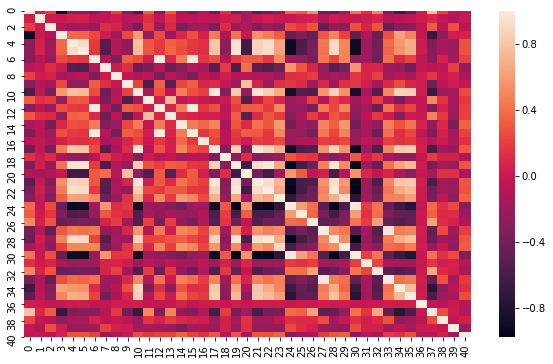

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(data.corr())

In [9]:
from src.models.lstm import build_model

build_params = dict(
    input_length=64,
    input_shape=data.shape[1],
    layers_size=[64, data.shape[1]],
    dropout_coeff=0.1,
)

Using TensorFlow backend.


Throw out not fully examples

In [10]:
seq_amount = data.shape[0] // build_params['input_length']
data = data.iloc[:seq_amount * build_params['input_length']]

In [11]:
X = data.iloc[:data.shape[0]-build_params['input_length']].to_numpy().\
        reshape(-1, build_params['input_length'], data.shape[1])
y = data.iloc[build_params['input_length']:].to_numpy().\
        reshape(-1, build_params['input_length'], data.shape[1])

In [12]:
fit_params = dict(
    batch_size=32,
    epochs=50,
    verbose=0,
)

In [15]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3)

results = []

for i, (train_idx, test_idx) in enumerate(kfold.split(X, y)):
    print(f'Fold {i}...')
    model = build_model(**build_params)
    history = model.fit(X[train_idx],
                        y[train_idx],
                        validation_data=(X[test_idx], y[test_idx]),
                        **fit_params)
    results.append(history.history)

W0906 19:28:17.572854 139965324986176 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Fold 0...


W0906 19:28:17.781421 139965324986176 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0906 19:28:17.788330 139965324986176 deprecation.py:506] From /home/elch10/miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0906 19:28:18.146394 139965324986176 deprecation_wrapper.py:119] From /home/elch10/miniconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0906 19:28:18.443428 139965324986176 deprecation.py:323] From /home/elch10/miniconda3/lib

Fold 1...
Fold 2...


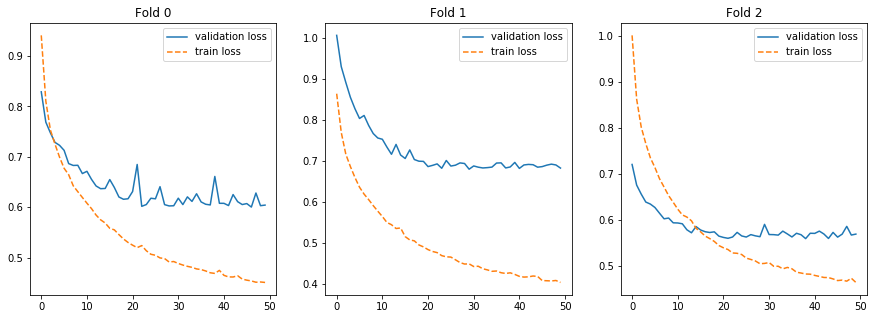

In [46]:
plt.figure(figsize=(5 * len(results), 5))
for i, result in enumerate(results):
    plt.subplot(1, len(results), i + 1)
    plt.title(f'Fold {i}')
    plt.plot(result['val_loss'], '-', label=f'validation loss')
    plt.plot(result['loss'], '--', label=f'train loss')
    plt.legend()